In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
from datetime import date
from sklearn import datasets
from scipy import stats

In [5]:
path = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190706.txt"
new_cols = ["C/A", "UNIT", "SCP", "STATION", "LINENAME", "DIVISION", "DATE", "TIME", "DESC", "ENTRIES", "EXITS"]
MTA_turnstile_sample_data_190706 = pd.read_csv(path, sep=",", header=0, names=new_cols)

In [7]:
MTA_turnstile_sample_data_190706 = MTA_turnstile_sample_data_190706.dropna()

In [8]:
### re-format column types
MTA_turnstile_sample_data_190706["TIME"] = (pd.to_datetime(MTA_turnstile_sample_data_190706["TIME"])).dt.time
MTA_turnstile_sample_data_190706["DAY_OF_WEEK"] = (pd.to_datetime(MTA_turnstile_sample_data_190706["DATE"])).dt.weekday_name # by day of the week
MTA_turnstile_sample_data_190706["MONTH"] = (pd.to_datetime(MTA_turnstile_sample_data_190706["DATE"])).dt.month # by month
MTA_turnstile_sample_data_190706['MONTH'] = MTA_turnstile_sample_data_190706['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [64]:
### add column with total turnstile activity
MTA_turnstile_sample_data_190706["TURNSTILE_PASSES"] = (MTA_turnstile_sample_data_190706["ENTRIES"] + MTA_turnstile_sample_data_190706["EXITS"])/1000000


In [49]:
### highest traffic as of 07/06/2019 is 61 ST WOOLSIDE with 3968.28319 million
### TURNSTILE_PASSES is divided by one million for brevity
MTA_turnstile_sample_data_190706["TURNSTILE_PASSES"].max() 
max_turnstile_station = MTA_turnstile_sample_data_190706[MTA_turnstile_sample_data_190706["TURNSTILE_PASSES"] == MTA_turnstile_sample_data_190706["TURNSTILE_PASSES"].max()]
max_turnstile_station.loc[:, "STATION"]

190582    61 ST WOODSIDE
Name: STATION, dtype: object

In [56]:
### top stations with the most activity
station_activity = MTA_turnstile_sample_data_190706.groupby("STATION", as_index = False)[["TURNSTILE_PASSES"]].max()
station_activity = station_activity.sort_values("TURNSTILE_PASSES", ascending = False)

n = 11 # get 1-n stations
station_activity_condensed = station_activity.iloc[0:n] 
top_stations = [station for station in station_activity["STATION"]]
print(top_stations[0:n])

['61 ST WOODSIDE', '47-50 STS ROCK', 'CHAMBERS ST', '23 ST', '42 ST-PORT AUTH', 'HIGH ST', '167 ST', '183 ST', 'CANAL ST', "B'WAY-LAFAYETTE", 'WORLD TRADE CTR']


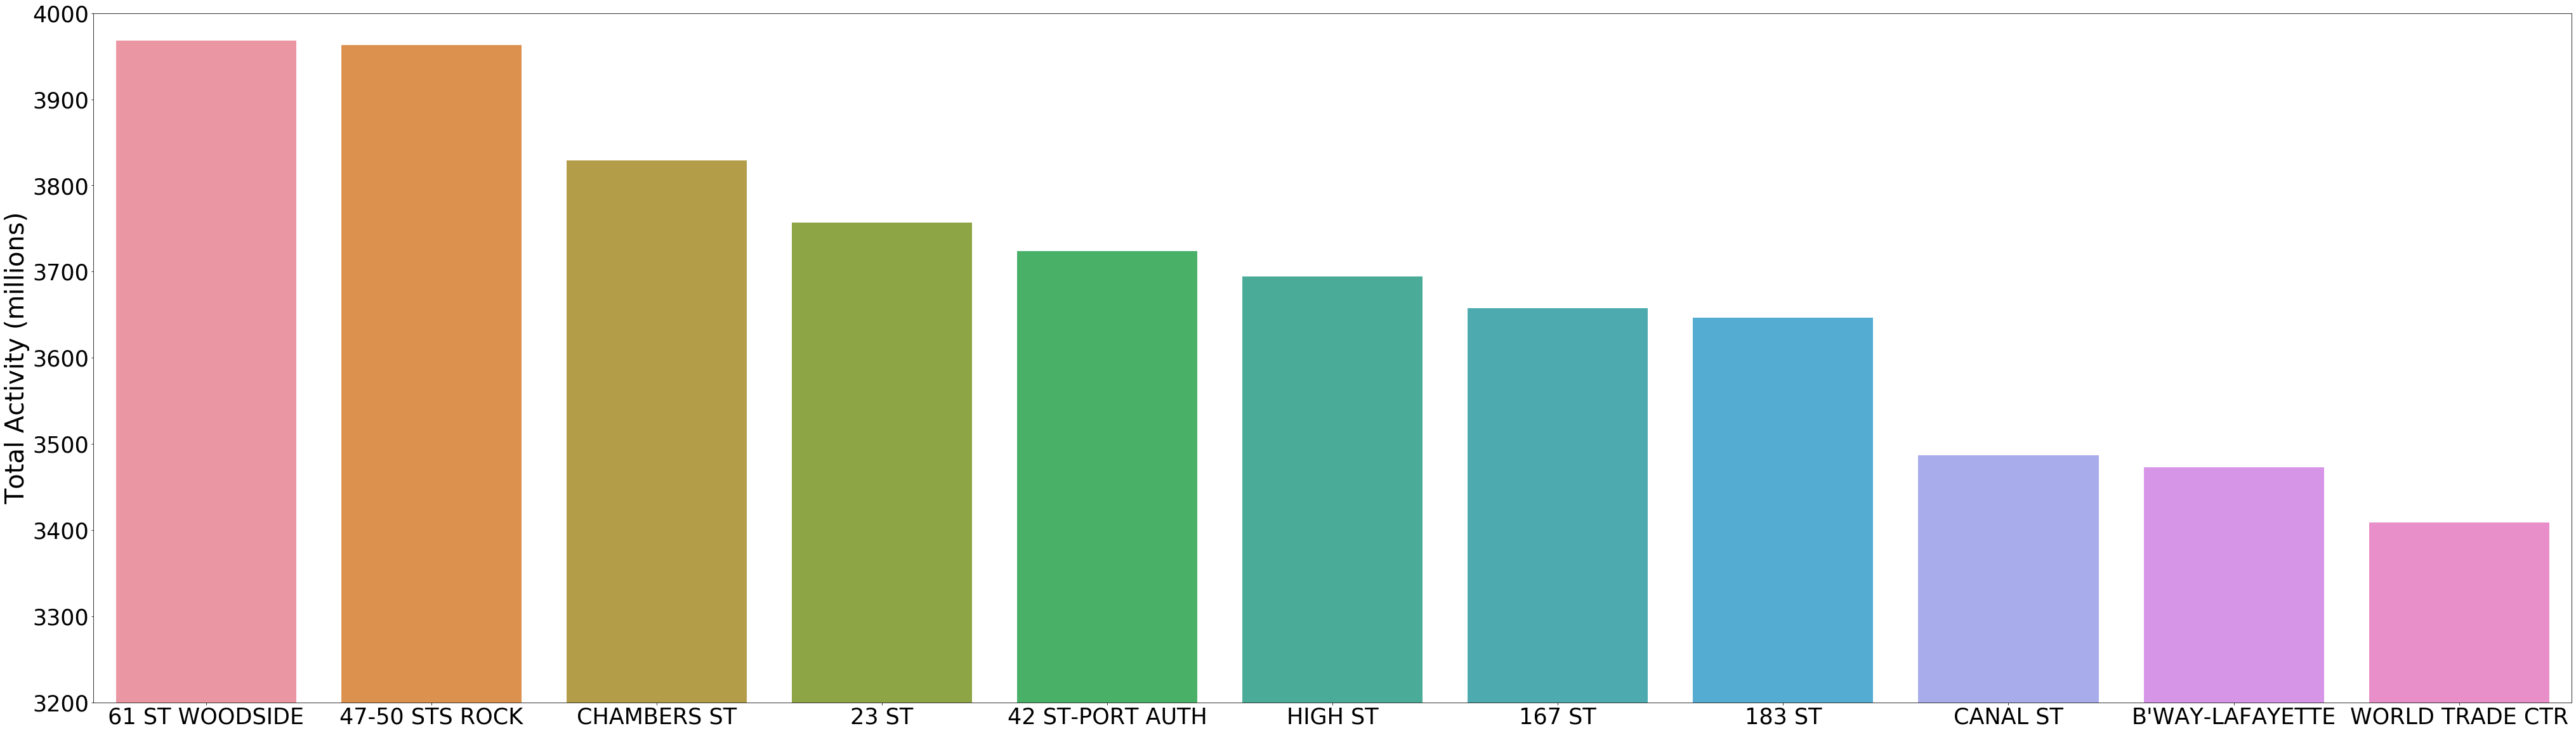

In [62]:
### plot the top n-1 stations with the most activity 
plt.figure(figsize=(70, 20))
activity_plot = sns.barplot(x = "STATION", y = "TURNSTILE_PASSES", data = station_activity_condensed);
activity_plot.set_xlabel(None);
activity_plot.set_ylabel("Total Activity (millions)",fontsize=40);
activity_plot.tick_params(labelsize=35)
activity_plot.set(ylim=(3200, 4000));